In [3]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
)
from ripple_heterogeneity.place_cells import place_cells_run
import nelpy as nel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
from statannotations.Annotator import Annotator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [11]:

save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\place_cell_w_field_detect_v5"

df = place_cells_run.load_in_everything(save_path)

In [14]:
df = add_new_deep_sup.add_new_deep_sup_class(df)


In [25]:
df["avg_fr_rate"] = df["n_spikes"] / (df["stopTime"] - df["startTime"])


In [90]:
df

,UID,environment,name,startTime,stopTime,spatial_infos,pvals,field_width,peak_rate,n_fields,linear_dir,basepath,n_spikes,deepSuperficialDistance,brainRegion,deepSuperficial,avg_fr_rate
0,1,linear,task,1140.0008,4199.9992,0.329763,0.002217,NaN,1.402965,NaN,0.0,Z:\Data\AYAold\AB1\day1,193,-178.457275,CA1so,Deep,0.063072
1,2,linear,task,1140.0008,4199.9992,0.522483,0.454545,NaN,0.204634,NaN,0.0,Z:\Data\AYAold\AB1\day1,18,171.542725,CA1sr,Superficial,0.005882
2,9,linear,task,1140.0008,4199.9992,0.695001,0.004435,78.000000,10.693503,2.0,0.0,Z:\Data\AYAold\AB1\day1,551,-28.457275,CA1so,middle,0.180065
3,10,linear,task,1140.0008,4199.9992,1.118734,0.004435,NaN,9.488677,NaN,0.0,Z:\Data\AYAold\AB1\day1,493,121.542725,CA1sr,Superficial,0.161111
4,12,linear,task,1140.0008,4199.9992,0.237600,0.119734,NaN,28.111099,NaN,0.0,Z:\Data\AYAold\AB1\day1,2614,-28.457275,CA1so,middle,0.854249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13108,80,bigSquare,ec016.582_bigSquare,5008.4460,10460.7460,3.606922,0.002217,NaN,13.921444,NaN,NaN,Z:\Data\Kenji\ec016.577_590,792,0.000000,CA1,middle,0.145260
13109,82,bigSquare,ec016.582_bigSquare,5008.4460,10460.7460,0.678545,0.002217,NaN,3.452300,NaN,NaN,Z:\Data\Kenji\ec016.577_590,869,23.292677,CA1,middle,0.159382
13110,84,bigSquare,ec016.582_bigSquare,5008.4460,10460.7460,3.501902,0.084257,NaN,1.814599,NaN,NaN,Z:\Data\Kenji\ec016.577_590,61,23.292677,CA1,middle,0.011188
13111,86,bigSquare,ec016.582_bigSquare,5008.4460,10460.7460,2.419502,0.002217,NaN,10.235981,NaN,NaN,Z:\Data\Kenji\ec016.577_590,695,3.292677,CA1,middle,0.127469


In [115]:
# concatename all environments with underscores between them
df.query("basepath=='Z:\Data\AYAold\AB3\AB3_38_41' & UID==1").environment.values.join("_")
# .environment.apply(lambda x: "_".join(x))
# df["env"] = df["env"].apply(lambda x: "_".join(x))

AttributeError: 'numpy.ndarray' object has no attribute 'join'

In [121]:
'_'.join(df.query("basepath=='Z:\Data\AYAold\AB3\AB3_38_41' & UID==1").environment.values)

'tmaze_linear_linear'

In [122]:
df_pivot = df.groupby(["basepath", "UID"]).apply(
    lambda x: pd.Series(
        {
            "deepSuperficial": x["deepSuperficial"].iloc[0],
            "n_env": x["environment"].shape[0],
            "info_specificity": x.spatial_infos.max() / x.spatial_infos.mean(),
            "peak_rate_specificity": x.peak_rate.max() / x.peak_rate.mean(),
            "avg_fr_rate_specificity": x.avg_fr_rate.max() / x.avg_fr_rate.mean(),
            "n_fields_rate_specificity": x.n_fields.max() / x.n_fields.mean(),
            "place_cell": any(x.pvals<0.01) & any(x.peak_rate>3) & any(x.n_spikes>200),
            "environment": '_'.join(x.environment.values)
        }
    )
).reset_index()
df_pivot = df_pivot.query("n_env > 2 & place_cell == True & deepSuperficial !='middle'")
df_pivot

,basepath,UID,deepSuperficial,n_env,info_specificity,peak_rate_specificity,avg_fr_rate_specificity,n_fields_rate_specificity,place_cell,environment
59,Z:\Data\AYAold\AB3\AB3_38_41,1,Deep,3,1.779547,1.725082,1.632013,1.200000,True,tmaze_linear_linear
60,Z:\Data\AYAold\AB3\AB3_38_41,2,Deep,3,1.565765,2.002688,2.089483,1.000000,True,tmaze_linear_linear
61,Z:\Data\AYAold\AB3\AB3_38_41,3,Deep,3,1.531164,1.936898,2.032029,1.333333,True,tmaze_linear_linear
62,Z:\Data\AYAold\AB3\AB3_38_41,4,Deep,3,1.426345,1.577095,1.031575,1.200000,True,tmaze_linear_linear
63,Z:\Data\AYAold\AB3\AB3_38_41,5,Deep,3,1.475496,1.210552,1.235135,1.000000,True,tmaze_linear_linear
...,...,...,...,...,...,...,...,...,...,...
5081,Z:\Data\Kenji\ec016.228_240,100,Deep,4,1.508012,1.122457,2.409469,1.333333,True,linear_linear_linear_linear
5085,Z:\Data\Kenji\ec016.228_240,108,Deep,4,1.789101,1.696379,1.977367,1.500000,True,linear_linear_linear_linear
5086,Z:\Data\Kenji\ec016.228_240,109,Deep,4,1.619725,2.048247,2.764225,1.000000,True,linear_linear_linear_linear
5087,Z:\Data\Kenji\ec016.228_240,110,Deep,4,1.601483,2.323168,2.708694,1.000000,True,linear_linear_linear_linear


In [127]:
df_pivot[["basepath","environment"]].value_counts().reset_index().rename(columns={0:"n_cells"})

,basepath,environment,n_cells
0,Z:\Data\GirardeauG\Rat11\Rat11-20150331,linear_linear_linear_linear,45
1,Z:\Data\AYAold\AB3\AB3_38_41,tmaze_linear_linear,38
2,Z:\Data\AYAold\AYA9\day12,linear_linear_box,31
3,Z:\Data\Can\OML23\day3,linear_linear_linear_linear,23
4,Z:\Data\GirardeauG\Rat10\Rat10-20140620,linear_linear_linear_linear,21
5,Z:\Data\GirardeauG\Rat08\Rat08-20130712,linear_linear_linear_linear,20
6,Z:\Data\Kenji\ec013.393_418,linear_linear_bigSquare_bigSquare_bigSquare_li...,18
7,Z:\Data\GirardeauG\Rat10\Rat10-20140629,linear_linear_linear_linear,18
8,Z:\Data\GirardeauG\Rat10\Rat10-20140622,linear_linear_linear_linear,18
9,Z:\Data\Kenji\ec013.421_447,bigSquare_bigSquare_linear_linear_linear_linea...,17


In [98]:
df_pivot = functions.add_animal_id(df_pivot)

In [101]:
df_pivot.basepath.nunique(),df_pivot.animal_id.nunique(), df_pivot.deepSuperficial.value_counts()

(57,
 11,
 Deep           516
 Superficial    118
 Name: deepSuperficial, dtype: int64)

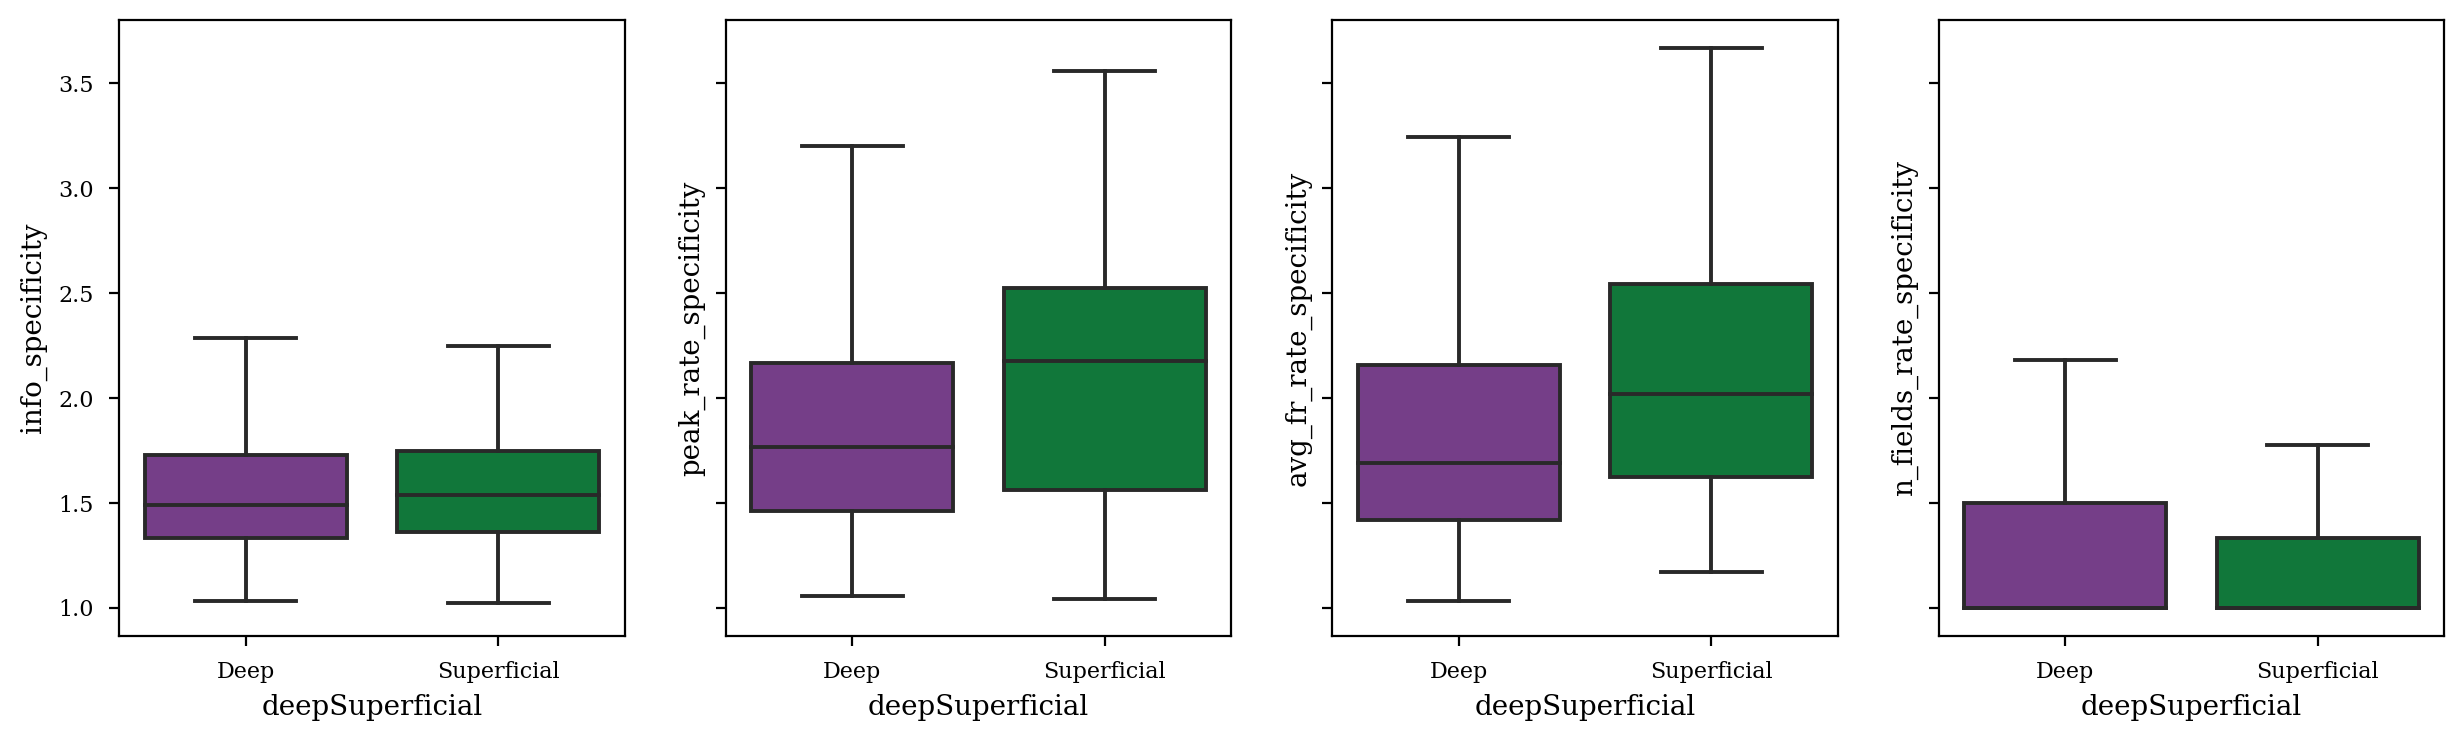

In [93]:
fig,ax = plt.subplots(1,4,figsize=(15,4),sharey=True)

group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

sns.boxplot(data=df_pivot, x="deepSuperficial", order=group_colors.keys(), y="info_specificity", showfliers=False, ax=ax[0])
sns.boxplot(data=df_pivot, x="deepSuperficial", order=group_colors.keys(), y="peak_rate_specificity", showfliers=False, ax=ax[1])
sns.boxplot(data=df_pivot, x="deepSuperficial", order=group_colors.keys(), y="avg_fr_rate_specificity", showfliers=False, ax=ax[2])
sns.boxplot(data=df_pivot, x="deepSuperficial", order=group_colors.keys(), y="n_fields_rate_specificity", showfliers=False, ax=ax[3])
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Deep vs. 1_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:4.748e-05 U_stat=2.314e+04


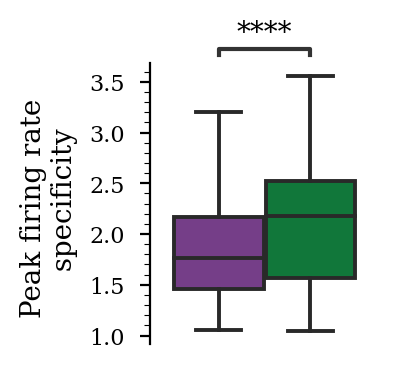

In [74]:
plt.figure(figsize=functions.set_size("thesis", fraction=.25, subplots=(2, 1)))

df_pivot["constant"] = 1
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

sns.boxplot(x="constant", y="peak_rate_specificity", hue="deepSuperficial", hue_order=group_colors.keys(),data=df_pivot,showfliers=False)
sns.despine(bottom=True)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().get_legend().remove()
plt.gca().axes.get_xaxis().set_ticks([])
plt.xlabel("")
plt.ylabel("Peak firing rate \n specificity")

box_pairs = [
    ((1, "Deep"),(1, "Superficial"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_pivot,
    x="constant",
    y="peak_rate_specificity",
    hue="deepSuperficial"
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "peak_rate_context_encoding_multi_mazes.svg"),
    dpi=300,
    bbox_inches="tight",
)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Deep vs. 1_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:8.221e-06 U_stat=2.244e+04


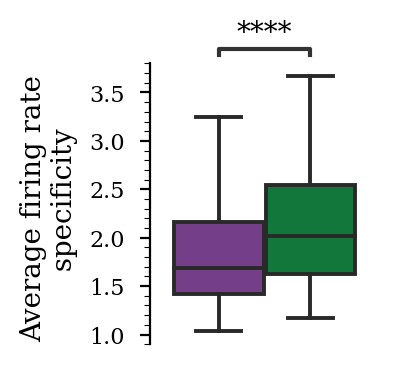

In [73]:
plt.figure(figsize=functions.set_size("thesis", fraction=.25, subplots=(2, 1)))

df_pivot["constant"] = 1
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

sns.boxplot(x="constant", y="avg_fr_rate_specificity", hue="deepSuperficial", hue_order=group_colors.keys(),data=df_pivot,showfliers=False)
sns.despine(bottom=True)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().get_legend().remove()
plt.gca().axes.get_xaxis().set_ticks([])
plt.xlabel("")
plt.ylabel("Average firing rate \n specificity")

box_pairs = [
    ((1, "Deep"),(1, "Superficial"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_pivot,
    x="constant",
    y="avg_fr_rate_specificity",
    hue="deepSuperficial"
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "avg_rate_context_encoding_multi_mazes.svg"),
    dpi=300,
    bbox_inches="tight",
)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Deep vs. 1_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:3.599e-01 U_stat=2.880e+04


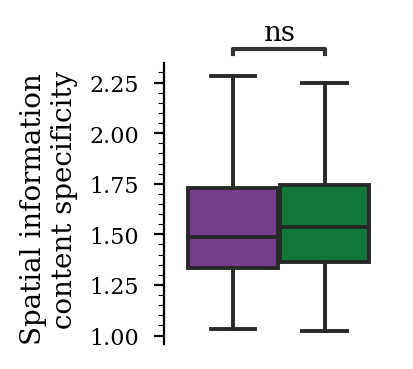

In [76]:
plt.figure(figsize=functions.set_size("thesis", fraction=.25, subplots=(2, 1)))

df_pivot["constant"] = 1
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

sns.boxplot(x="constant", y="info_specificity", hue="deepSuperficial", hue_order=group_colors.keys(),data=df_pivot,showfliers=False)
sns.despine(bottom=True)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().get_legend().remove()
plt.gca().axes.get_xaxis().set_ticks([])
plt.xlabel("")
plt.ylabel("Spatial information \n content specificity")

box_pairs = [
    ((1, "Deep"),(1, "Superficial"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_pivot,
    x="constant",
    y="info_specificity",
    hue="deepSuperficial"
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "spatial_info_context_encoding_multi_mazes.svg"),
    dpi=300,
    bbox_inches="tight",
)